In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
import warnings
warnings.filterwarnings("ignore")
plt.style.use("seaborn")


In [268]:
#Prepare the dataframe, convert quarters to datetime and dropnas
df = pd.read_excel("inflation.xlsx")
df["year"] = pd.to_datetime(df['year'])
df = df.dropna()

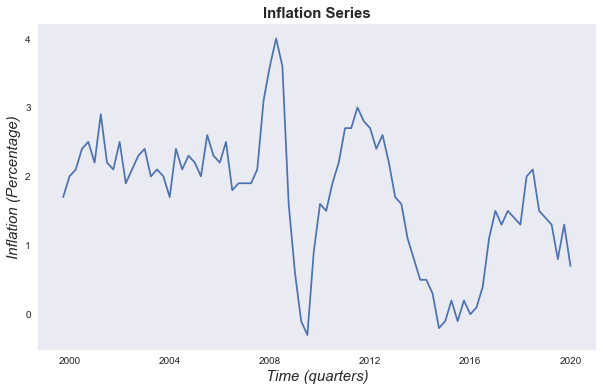

In [269]:
#Plot inflation
fig = plt.figure(figsize=(10,6))
ax = plt.gca()
# ax = plt.subplot(111)

ttl = plt.title("Inflation Series")
ttl.set_weight("bold")
ttl.set_size(15)
xlab = ax.set_xlabel("Time (quarters)",)
ylab = ax.set_ylabel("Inflation (Percentage)")
xlab.set_style('italic')
xlab.set_size(15)
ylab.set_style('italic')
ylab.set_size(15)
plt.grid(None)
plt.plot(df["year"], df["series"])

plt.show()



In [270]:
#Unit root test
result = adfuller(df["series"],regression = 'c')[1]
print(f'P-Value: {result}')

P-Value: 0.25827254771132413


In [271]:
#Create first difference
first_difference = df["series"].diff()

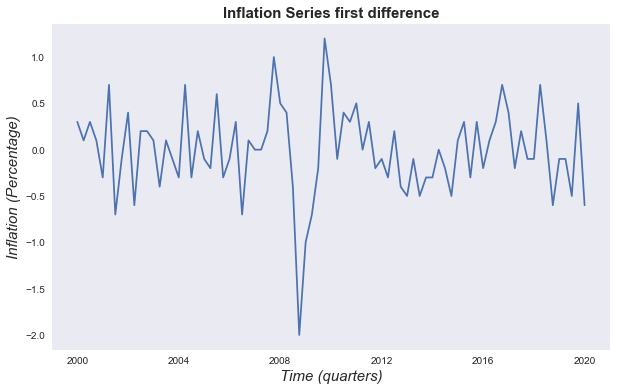

In [272]:
#Plot differenced series
fig = plt.figure(figsize=(10,6))
ax = plt.gca()
# ax = plt.subplot(111)

ttl = plt.title("Inflation Series first difference")
ttl.set_weight("bold")
ttl.set_size(15)
xlab = ax.set_xlabel("Time (quarters)",)
ylab = ax.set_ylabel("Inflation (Percentage)")
xlab.set_style('italic')
xlab.set_size(15)
ylab.set_style('italic')
ylab.set_size(15)
plt.grid(None)
plt.plot(df["year"], first_difference)

plt.show()

In [273]:
#Remove nas and apply DF test on differenced series
first_difference = first_difference.dropna()
result1 = adfuller(first_difference,regression = 'c')[1]
print(f'P-Value: {result1}')

P-Value: 0.00046571762558394683


**ANALYSIS**

In [274]:
#Divide in train and test data
df.set_index(df["year"], inplace=True)
df.index.rename("time", inplace=True)
df.drop("year", axis=1, inplace=True)
train_data = df["2000":"2014"]
test_data = df["2015":]

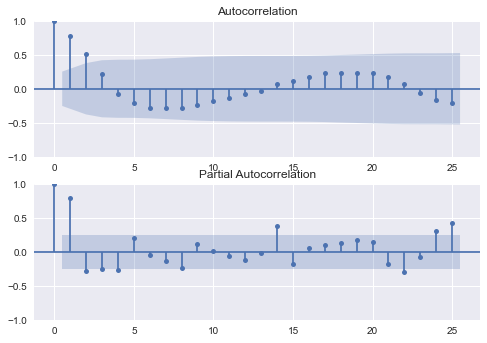

In [284]:
#Plot ACF and PACF
plt.figure()
plt.subplot(211)
plot_acf(train_data["series"], lags=25, ax=plt.gca())
plt.subplot(212)
plot_pacf(train_data["series"], lags=25, ax=plt.gca())
plt.show()

In [289]:
ar1 = ARIMA(train_data["series"], order=(1,0,0), trend='c')
ar1_fit = ar1.fit()
ar1_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 series   No. Observations:                   60
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -42.418
Date:                Tue, 14 Dec 2021   AIC                             90.836
Time:                        12:07:17   BIC                             97.119
Sample:                    01-01-2000   HQIC                            93.293
                         - 10-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8043      0.468      3.856      0.000       0.887       2.721
ar.L1          0.8582      0.059     14.514      0.000       0.742       0.974
sigma2         0.2355      0.039      6.037      0.000       0.159       0.312
===================================================================================
Ljung-Box (L1) (Q):                   5.57   Jarque-Bera (JB):                 9.44
Prob(Q):                              0.02   Prob(JB):                         0.01
Heteroskedasticity (H):               1.15   Skew:                            -0.61
Prob(H) (two-sided):                  0.75   Kurtosis:                         4.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='time'>

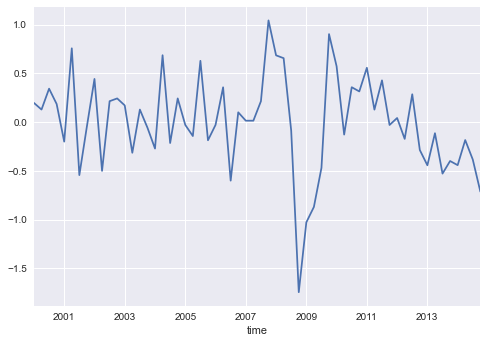

In [299]:
residuals = ar1_fit.resid
residuals.plot()

In [306]:
#MSE
np.mean(residuals**2)

0.23593908274437173

In [311]:
#Portmanteu Test
acorr_ljungbox(residuals, lags=10)

,lb_stat,lb_pvalue
1,5.576046,0.018208
2,7.081491,0.028992
3,7.209034,0.065525
4,16.392491,0.002535
5,18.377973,0.002508
6,18.879222,0.004373
7,19.039052,0.008066
8,19.243837,0.013609
9,19.243931,0.023197
10,19.346051,0.036081


In [316]:
ar1_fit.forecast(test_data)

TypeError: Cannot convert input [            series  forecast
time                        
2015-01-01    -0.1       1.2
2015-04-01     0.2       1.2
2015-07-01    -0.1       1.1
2015-10-01     0.2       0.8
2016-01-01     0.0       1.0
2016-04-01     0.1       1.2
2016-07-01     0.4       1.1
2016-10-01     1.1       1.2
2017-01-01     1.5       1.1
2017-04-01     1.3       1.1
2017-07-01     1.5       1.2
2017-10-01     1.4       1.4
2018-01-01     1.3       1.5
2018-04-01     2.0       1.5
2018-07-01     2.1       1.5
2018-10-01     1.5       1.6
2019-01-01     1.4       1.6
2019-04-01     1.3       1.6
2019-07-01     0.8       1.7
2019-10-01     1.3       1.6
2020-01-01     0.7       1.5] of type <class 'pandas.core.frame.DataFrame'> to Timestamp